#Introduction to dataset


In this data set 'Python_mandatory_project_supermarket_sales.xlsx' contains the information about Branch, Unit price, Quantity, Tax, Date and Time, in a Supermarket. In this project we are going to use python to address certain questions. 

Variables used in this dataset is:

1: Gender = About Male and Female

2: cogs = Cost of goods sold

3: Branch = Number of branches

4: date = Date of purchase

5: time = Purchase time



In [39]:
#importing required library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#uploding a file
from google.colab import files
uploaded = files.upload()

Saving Python_mandatory_project_supermarket_sales.xlsx to Python_mandatory_project_supermarket_sales.xlsx


In [40]:
#reading the file, new name(tit) is given to this excel.
tit = pd.read_excel("Python_mandatory_project_supermarket_sales.xlsx")
tit

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,CT3,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,CT9,Normal,Female,PD3,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,CT1,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,CT1,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [4]:
#checking the number of row and columns
tit.shape

(1000, 17)

We have 1000 rows and 17 columns

In [ ]:
#checking the information of a dataset
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

#Q1. Is your supermarket more popular with males or females?

In [ ]:
# Counting total numbers in each category
count = tit['Gender'].value_counts()

# Checking the numbers
count

Female    501
Male      499
Name: Gender, dtype: int64

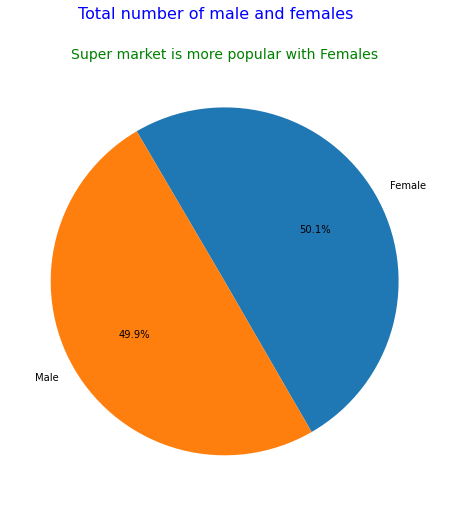

In [ ]:
# Creating categories based on numbers
gender = ['Female', 'Male']
# Creating plot
fig = plt.figure(figsize =(10, 8))
# Show plot
plt.pie(count, labels = gender,autopct='%1.1f%%',shadow=False, startangle=300)
plt.suptitle("Total number of male and females",fontsize=16,color='blue')
plt.title("Super market is more popular with Females", fontsize=14,color='green')
plt.show()

#Q2.What does the customer rating look like and can you also comment on its distribution?

In [ ]:
#finding ratings of customer including mean
avgrating = tit.Rating.mean() 
avgrating

6.966163141993961

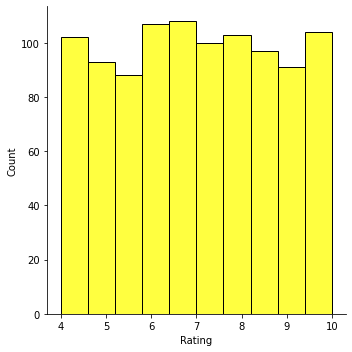

In [ ]:
#using histogram plot
sns.displot(tit, x="Rating", bins = 10,color='yellow')

Here ratings on 'x' axis and count in 'y' axis, will shows the customer average ratings is between 6 and 7

#Q3. What can you say about the aggregate sales across the branches?

In [ ]:
#for finding aggregate sales across the branches using groupby function 
bin_by = tit.groupby(('Branch')).agg({'Total':"sum"})
bin_by = bin_by.reset_index()    #by indexing
bin_by

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


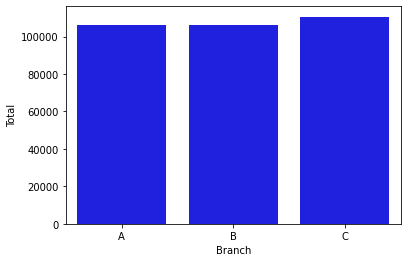

In [ ]:
#comparing sales with branches using bar plot
sns.barplot(data = bin_by, x = 'Branch', y = 'Total', color = 'blue',ci = None) 

This graph shows that the Branch C has highest sales

#Q4.Which is the most popular payment method used by customers?

In [ ]:
#using groupby function to find out aggregate sales across the branches
Payment_m = tit.groupby(('Payment')).agg({'Total':"count"}) #here agg means average 
Payment_m = Payment_m.reset_index()  # by indexing
Payment_m

,Payment,Total
0,Cash,344
1,Credit card,311
2,Ewallet,345


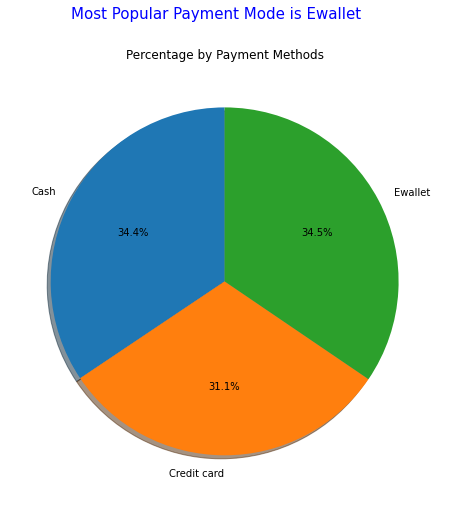

In [ ]:
# Creating categories based on numbers
Payment = Payment_m.Payment
Payment_method = Payment_m.Total
# Creating plot
fig = plt.figure(figsize =(10, 8))      #placing the figure size
# Show plot includes the fallowing.
plt.pie(Payment_method, labels = Payment,autopct='%1.1f%%',shadow=True, startangle=90)   # to get shadow we are putting true.
plt.title("Percentage by Payment Methods")
plt.suptitle("Most Popular Payment Mode is Ewallet",fontsize= 15,color='blue')
plt.show()

#Q5.Does gross income affect customer ratings? 

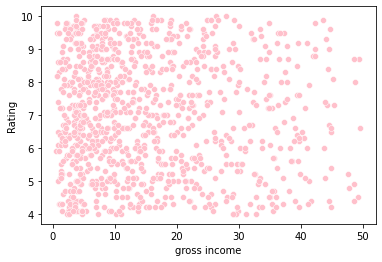

In [ ]:
# using a scatterplot
sns.scatterplot(x= "gross income", y= "Rating",color='pink', data = tit)  
plt.show()      # To show the plot


The above graph shows that gross income does not affect the customer ratings

#Q6.Which is the most profitable branch? 

In [ ]:
#by using groupby function
pb = tit.groupby(('Branch')).agg({'gross income':"sum"})
pb = pb.reset_index()
pb

,Branch,gross income
0,A,5057.1605
1,B,5057.0320
2,C,5265.1765


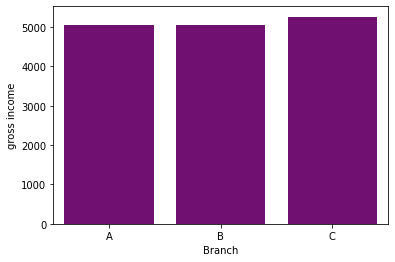

In [ ]:
# using barplot to visualize 
sns.barplot(data = pb, x = 'Branch', y = 'gross income', color = 'purple',ci = None)

From this graph it is observed that Branch C is most profitable.

#Q7.Create a boxplot between Gender and Gross income and explain the results?

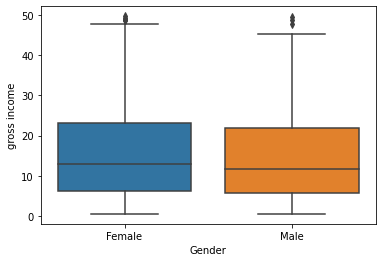

In [ ]:
#showing boxplot
sns.boxplot(x='Gender', y='gross income', data=tit)

In this graph shows that the average gross income of female is better than male in this supermarket.

#Q8.Can you see any time trend in gross income? 

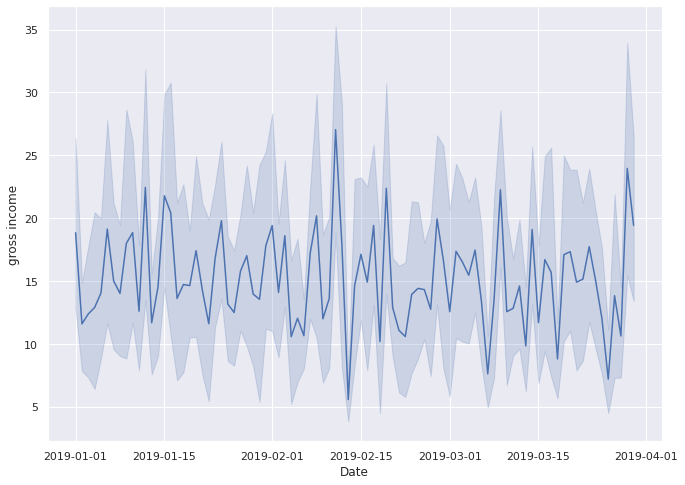

In [ ]:
#by using lineplot to see the trend
sns.set(rc={'figure.figsize':(11,8)})
sns.lineplot( x = "Date",y = "gross income",data = tit)

From the above line graph no such trend is observed

#Q9.What is the spending pattern of both males and females, meaning in which category do they spend more? 

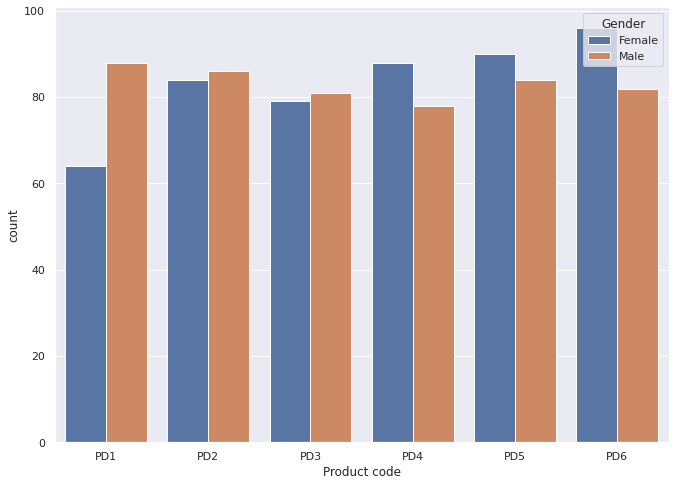

In [ ]:
#by using count plot.
sns.countplot(x='Product code', hue='Gender', data= tit) 

From the above figure it is observed that Females spend maximum in Fashion accessories and Males spend maximum in Health and beauty products. 

#Q10. How many products are bought by customers? 

In [ ]:
#calculating the sum of products
tit.Quantity.sum()

5510

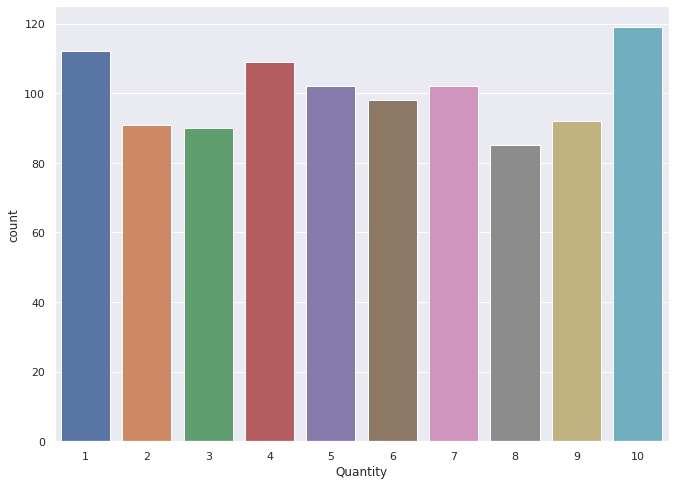

In [ ]:
sns.countplot(x='Quantity', data= tit)  #by using count plot to show the chart

From the above graph the number of customer who purchased the quantity 10 are highest

#Q11.Which day of the week has maximum sales? 

In [51]:
#finding the days for given date and adding day column.

day = tit['Date'].dt.day_name()
tit['Day'] = day
tit['Day']

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Day, Length: 1000, dtype: object

In [52]:
#added a day column in the data.
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [53]:
#by using groupby function with indexing.
dy = tit.groupby(('Day')).agg({'Total':'sum'})
dy= dy.reset_index()
dy

,Day,Total
0,Friday,43926.3405
1,Monday,37899.0780
2,Saturday,56120.8095
3,Sunday,44457.8925
4,Thursday,45349.2480
5,Tuesday,51482.2455
6,Wednesday,43731.1350


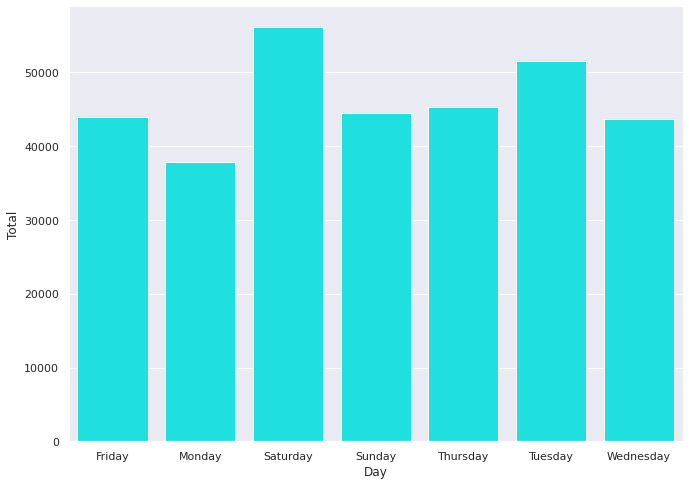

In [ ]:
# Comparing mean of categorical column
sns.barplot(data = dy, x = 'Day', y = 'Total', color = 'cyan',ci = None)

By this above graph shows that saturday of the week has maximum sales.

#Q12.Which product line should your supermarket focus on? 

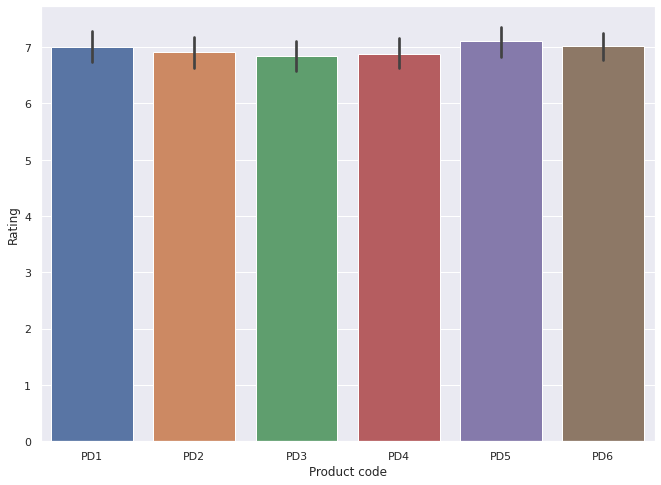

In [ ]:
#by using bar plot to know the ratings
sns.barplot(x='Product code', y='Rating', data=tit)
sns.set(rc={'figure.figsize':(14,7)})

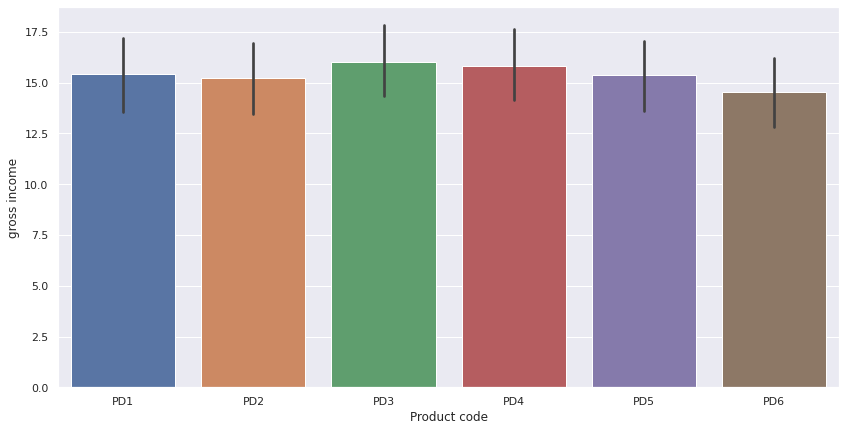

In [ ]:
sns.barplot(x='Product code', y='gross income', data=tit)
sns.set(rc={'figure.figsize':(14,7)})

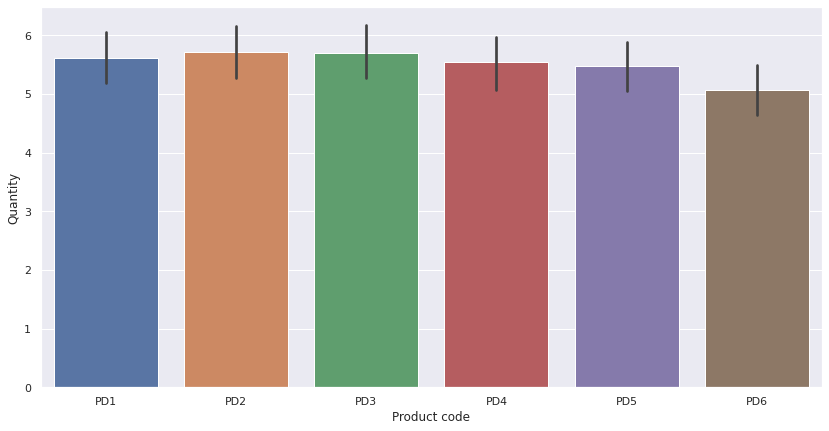

In [ ]:
#using barplot to know the quantity purchased
sns.barplot(x='Product code', y='Quantity', data=tit)
sns.set(rc={'figure.figsize':(14,7)})

The above graph indicates that the ratings is high of pd6 but gross income and quantity purchased is low so the supermarket should focus on pd6

#Q13.Which city should be chosen for expansion and what products should be focussed on?

In [ ]:
#by using group by function
City = tit.groupby(('city code ')).agg({'Total':'sum'})
City= City.reset_index()
City

,city code,Total
0,CT1,106200.3705
1,CT3,110568.7065
2,CT9,106197.6720


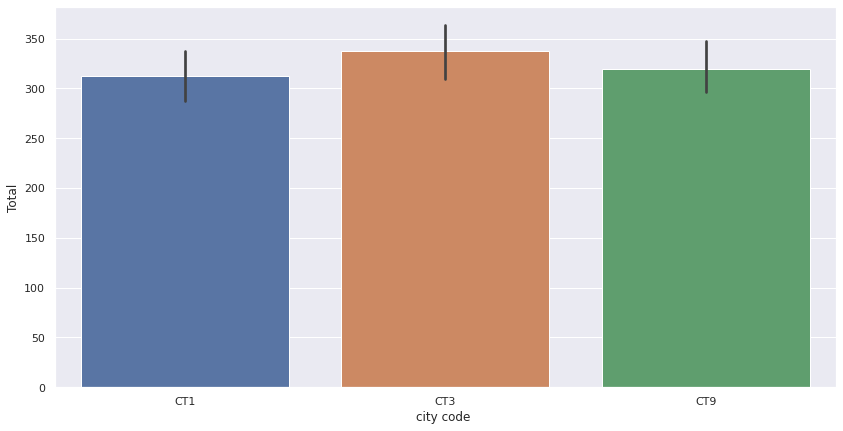

In [ ]:
#by using barplot
sns.barplot(x='city code ', y='Total', data =tit) 


In [ ]:
City = tit.groupby(('city code ')).agg({'gross income':'sum'})
City= City.reset_index()
City

,city code,gross income
0,CT1,5057.1605
1,CT3,5265.1765
2,CT9,5057.0320


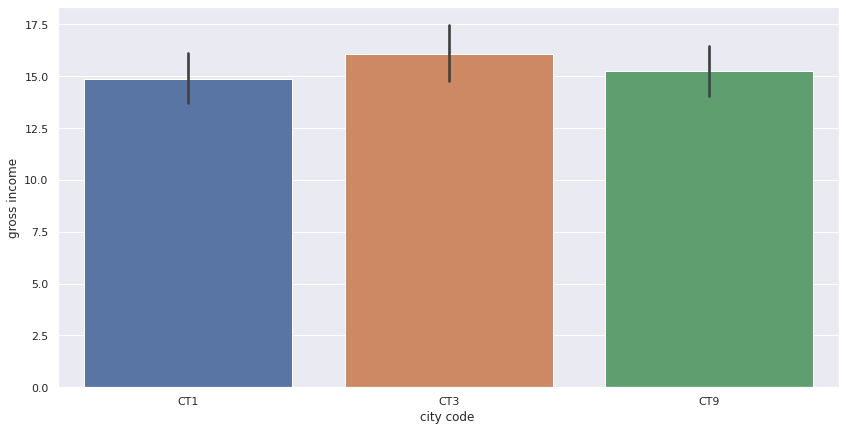

In [ ]:
sns.barplot(x='city code ', y='gross income', data =tit)

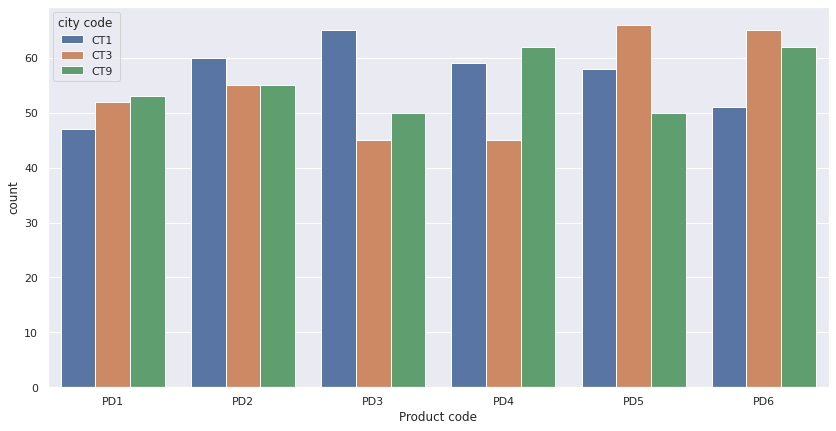

In [ ]:
sns.countplot(x='Product code', hue= 'city code ', data = tit)

In this above graph citycode of CT3 is better to expansion.